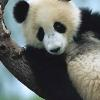

In [4]:
from __future__ import print_function
import os
from io import BytesIO
import numpy as np
from functools import partial
import PIL.Image
from IPython.display import clear_output, Image, display, HTML

import tensorflow as tf

MODEL_DIR = "../../tmp/imagenet/"

image = os.path.join(MODEL_DIR, 'cropped_panda.jpg')

display(Image(image))

In [5]:
def create_graph():
  """Creates a graph from saved GraphDef file and returns a saver."""
  # Creates graph from saved graph_def.pb.
  with tf.gfile.FastGFile(os.path.join(
      MODEL_DIR, 'classify_image_graph_def.pb'), 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')

create_graph()

In [11]:
with tf.Session() as sess:
    tensor_param = sess.graph.get_tensor_by_name('conv/conv2d_params:0')
    _ = sess.run(tensor_param)
    print(_[:,:,:,15])

[[[ 0.50504398  0.63588464  0.29835746]
  [ 0.17330708  0.12650244  0.14368619]
  [-0.65657198 -0.81724554 -0.38719007]]

 [[ 0.62418926  0.76585162  0.34903738]
  [ 0.07726436  0.05995356  0.09628339]
  [-0.85024583 -0.96480691 -0.50737208]]

 [[ 0.13164113  0.15118749 -0.01220882]
  [ 0.02298364 -0.01118473 -0.0186027 ]
  [ 0.00497579  0.01391865  0.02939422]]]


In [8]:
image_data = tf.gfile.FastGFile(image, 'rb').read()
with tf.Session() as sess:
    tensor_jpeg = sess.graph.get_tensor_by_name('DecodeJpeg:0')
    print(tensor_jpeg)
    _ = sess.run(tensor_jpeg, {'DecodeJpeg/contents:0': image_data})
    print(_.shape)

Tensor("DecodeJpeg:0", shape=(?, ?, 3), dtype=uint8)
(100, 100, 3)
